# Problem

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [2]:
# Load data in separate cell, it takes too long to keep reloading
data = pd.read_excel('compiled.xlsx')

#### Data Preparation

In [3]:
# Check for Nan data
data.isnull().values.any()

False

In [4]:
# Convert True/False to 1/0
data.replace({False: 0, True: 1}, inplace=True)

In [5]:
# Convert categorical family into numerical
data['family'] = data['family'].replace({'BREAD/BAKERY': '1', 
                                         'DAIRY': '2', 
                                         'DELI': '3', 
                                         'EGGS': '4',
                                         'FROZEN FOODS': '5',
                                         'MEATS': '6',
                                         'POULTRY': '7',
                                         'PREPARED FOODS': '8',
                                         'PRODUCE': '9',
                                         'SEAFOOD': '10'})

In [6]:
# Create a new column that combines the "holiday" and "onpromotion" values
data['holiday_onpromotion'] = data['holiday'] + data['onpromotion']

In [7]:
# Filter out rows where sales = 0
data = data[data['sales'] != 0]

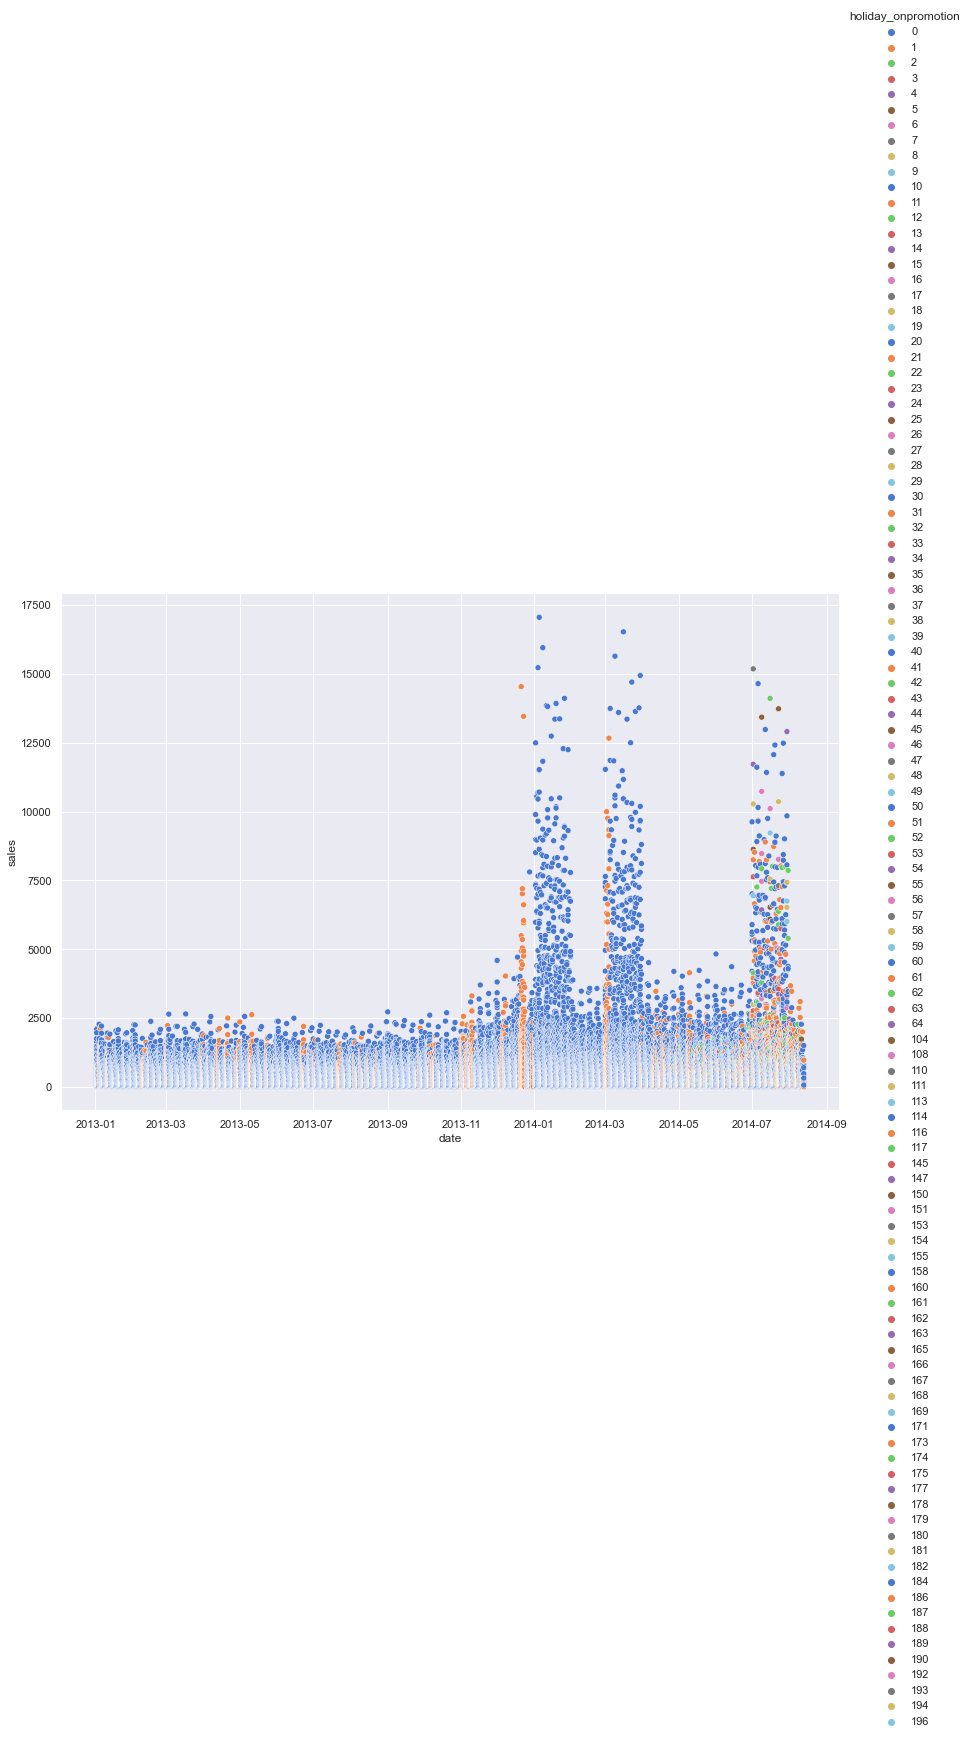

In [12]:
sb.relplot(x='date', y='sales', data=data, hue='holiday_onpromotion', 
            palette='muted', height=8, aspect=1.5, kind='scatter')

In [16]:
data['store_nbr'].describe()

<bound method NDFrame.describe of 180       1
181       1
182       1
183       1
184       1
         ..
105905    3
105906    3
105907    3
105908    3
105909    3
Name: store_nbr, Length: 95916, dtype: int64>

In [14]:
data

,id,date,store_nbr,family,sales,onpromotion,holiday,holiday_onpromotion
180,1787,2013-01-02,1,1,470.652,0,0,0
181,1790,2013-01-02,1,2,579.000,0,0,0
182,1791,2013-01-02,1,3,164.069,0,0,0
183,1792,2013-01-02,1,4,246.000,0,0,0
184,1793,2013-01-02,1,5,131.000,0,0,0
...,...,...,...,...,...,...,...,...
105905,1048566,2014-08-13,3,6,700.607,0,0,0
105906,1048570,2014-08-13,3,7,974.098,1,0,1
105907,1048571,2014-08-13,3,8,324.293,0,0,0
105908,1048572,2014-08-13,3,9,10.000,1,0,1
